In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('hospital_readmission_dataset.csv')

In [ ]:
df.shape

(100, 9)

In [ ]:
df.head()

,PatientID,Name,Age,Gender,Diagnosis,TreatmentCost,DaysInHospital,PreviousVisits,Readmitted
0,2000,Benjamin Davis,39,Male,Cancer,6506,4,1,Yes
1,2001,Shannon Bennett,38,Male,Asthma,8912,1,0,Yes
2,2002,Heather Olson,52,Male,Asthma,11863,1,4,Yes
3,2003,Benjamin Carter,78,Male,COPD,11654,5,0,Yes
4,2004,Eduardo Hayes,79,Female,Heart Disease,4547,4,2,Yes


In [ ]:
diiagnosis = df['Diagnosis'].unique()

In [ ]:
pseudo_map = {diagnosis : f'd_{i}' for i,diagnosis in enumerate(diiagnosis)}

In [ ]:
df['Diagnosis'] = df['Diagnosis'].map(pseudo_map)

In [ ]:
df.head()

,PatientID,Name,Age,Gender,TreatmentCost,DaysInHospital,PreviousVisits,Readmitted,Diagnosis_d_0,Diagnosis_d_1,Diagnosis_d_2,Diagnosis_d_3,Diagnosis_d_4,Diagnosis_d_5
0,2000,Benjamin Davis,25-45,Male,6506,4,1,Yes,1,0,0,0,0,0
1,2001,Shannon Bennett,25-45,Male,8912,1,0,Yes,0,1,0,0,0,0
2,2002,Heather Olson,45-65,Male,11863,1,4,Yes,0,1,0,0,0,0
3,2003,Benjamin Carter,65-95,Male,11654,5,0,Yes,0,0,1,0,0,0
4,2004,Eduardo Hayes,65-95,Female,4547,4,2,Yes,0,0,0,1,0,0


In [ ]:
df = pd.get_dummies(df,columns=['Diagnosis'],dtype=int)

In [ ]:
df['Age'] = pd.cut(df['Age'],bins=[0,25,45,65,95],labels=['0-25','25-45','45-65','65-95'])

In [ ]:
from sklearn.preprocessing import OneHotEncoder


le = OneHotEncoder()
df['Diagnosis'] = le.fit_transform(df['Diagnosis'])

In [ ]:
df['PatientID'] = ['UserID_'+str(i) for i in range(len(df))]

In [ ]:
df['Name'] = ['Name_'+str(i) for i in range(len(df))]

In [ ]:
import hashlib

In [ ]:
def hash_text(text):
  return hashlib.sha256(text.encode()).hexdigest()

In [ ]:
df['Diagnosis'] = df['Diagnosis'].apply(hash_text)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder


In [ ]:
df = pd.get_dummies(df,columns=['Diagnosis'],dtype=int)

In [ ]:
le_encoder = LabelEncoder()
df['Gender'] = le_encoder.fit_transform(df['Gender'])

In [ ]:
df['Readmitted'] = le_encoder.fit_transform(df['Readmitted'])

In [ ]:
df.head()

,PatientID,Name,Age,Gender,TreatmentCost,DaysInHospital,PreviousVisits,Readmitted,Diagnosis_Asthma,Diagnosis_COPD,Diagnosis_Cancer,Diagnosis_Diabetes,Diagnosis_Heart Disease,Diagnosis_Hypertension
0,UserID_0,Name_0,39,1,6506,4,1,1,0,0,1,0,0,0
1,UserID_1,Name_1,38,1,8912,1,0,1,1,0,0,0,0,0
2,UserID_2,Name_2,52,1,11863,1,4,1,1,0,0,0,0,0
3,UserID_3,Name_3,78,1,11654,5,0,1,0,1,0,0,0,0
4,UserID_4,Name_4,79,0,4547,4,2,1,0,0,0,0,1,0


In [ ]:
X=df.drop(columns=['Readmitted','PatientID','Name'],axis=1)

In [ ]:
y = df['Readmitted']

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X,y)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
import shap

In [ ]:
explainer = shap.Explainer(model,X)

In [ ]:
shap_values = explainer(X)

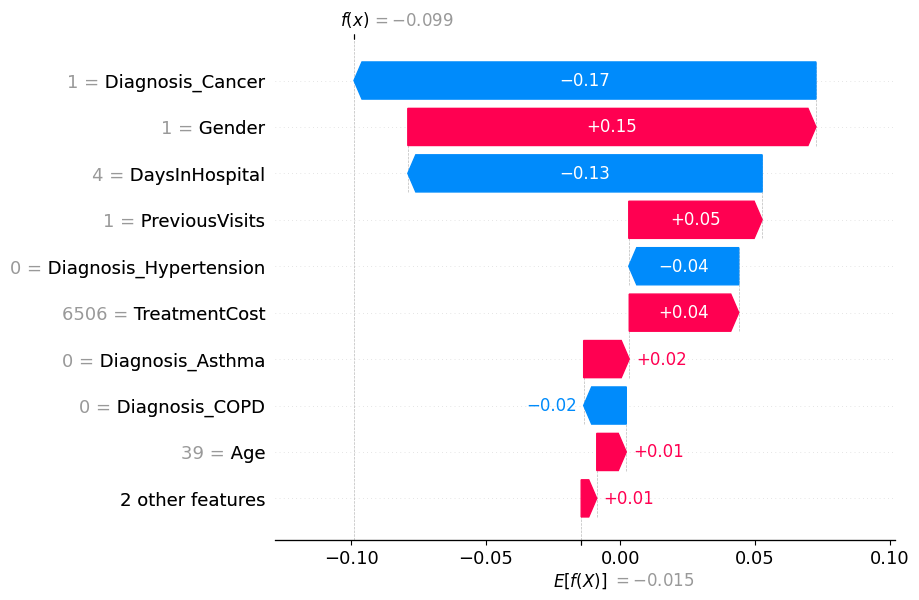

In [ ]:
shap.plots.waterfall(shap_values[0])

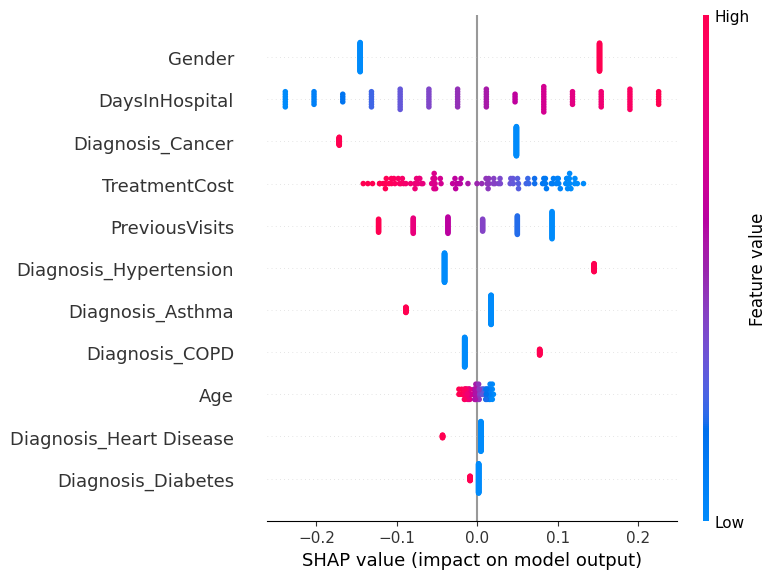

In [ ]:
shap.summary_plot(shap_values,X)